# **BUSINESS UNDERSTANDING**

Tanzania, as a developing country, struggles with providing clean water to its population of over 57,000,000. There are many water points already established in the country, but some are in need of repair while others have failed altogether.The objective is to help the government and NGOs efficiently allocate resources to maintain and repair water points, ensuring clean and reliable water access for communities.

# Problem Statement

Access to clean water is critical for public health, agriculture, and daily life. However, many water pumps in Tanzania fail due to poor maintenance, lack of resources, or environmental factors. Identifying which pumps are functional, non-functional, or functional but in need of repair can help authorities make data-driven decisions on resource allocation and infrastructure improvement.

# Objectives

The main goal of the project is to predict the functionality of water pumps in Tanzania using data-driven methods. By doing so, organizations can allocate resources effectively and improve water access for communities. The specific objectives include:

1. To predict the water pump functionality
2. To improve maintenance planning and resource allocation
3. To identify key factors affecting pump performance
4. To reduce the costs and improve efficiency

# Research Questions


1. How accurately can we predict water pump functionality using machine learning models?
2. What are the key factors influencing pump failures and long-term reliability?
3. How does pump age and installation quality affect its likelihood of failure?
4. Can predictive analytics improve preventative maintenance and reduce repair costs?
5. How can data-driven insights help optimize resource allocation for sustainable water access?

# Success Criteria

The project will be considered successful if it accurately predicts pump failures, optimizes maintenance efforts, reduces costs, improves water accessibility, and provides actionable insights for data-driven decision-making by stakeholders.

# The target variable categorizes water points into three groups:

1. Functional – The water point is fully operational with no repairs needed.
2. Functional but needs repair – The water point works but requires maintenance.
3. Non-functional – The water point is not operational.
The raw data is originally sourced from the Tanzanian Ministry of Water and supplied by Taarifa.

# Limitations

1. Missing data value in the dataset


# DATA UNDERSTANDING

In [279]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [280]:
#reading the data
train = pd.read_csv("train.csv")
labels = pd.read_csv("train_labels.csv")
test = pd.read_csv("test.csv")
train.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [281]:
# Labels data
labels.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [282]:
#checking for the rows and columns
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55763 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59398 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [283]:
#the label data info
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            59400 non-null  int64 
 1   status_group  59400 non-null  object
dtypes: int64(1), object(1)
memory usage: 928.3+ KB


In [284]:
#checking the data type
train.dtypes

id                         int64
amount_tsh               float64
date_recorded             object
funder                    object
gps_height                 int64
installer                 object
longitude                float64
latitude                 float64
wpt_name                  object
num_private                int64
basin                     object
subvillage                object
region                    object
region_code                int64
district_code              int64
lga                       object
ward                      object
population                 int64
public_meeting            object
recorded_by               object
scheme_management         object
scheme_name               object
permit                    object
construction_year          int64
extraction_type           object
extraction_type_group     object
extraction_type_class     object
management                object
management_group          object
payment                   object
payment_ty

In [285]:
#checking numerical columns
train.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


In [286]:
#checking for categorical columns
train.describe(include="O")

,date_recorded,funder,installer,wpt_name,basin,subvillage,region,lga,ward,public_meeting,recorded_by,scheme_management,scheme_name,permit,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
count,59400,55763,55745,59398,59400,59029,59400,59400,59400,56066,59400,55522,30590,56344,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400
unique,356,1896,2145,37399,9,19287,21,125,2092,2,1,11,2695,2,18,13,7,12,5,7,7,8,6,5,5,10,7,3,7,6
top,2011-03-15,Government Of Tanzania,DWE,none,Lake Victoria,Madukani,Iringa,Njombe,Igosi,True,GeoData Consultants Ltd,VWC,K,True,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
freq,572,9084,17402,3563,10248,508,5294,2503,307,51011,59400,36793,682,38852,26780,26780,26780,40507,52490,25348,25348,50818,50818,33186,33186,17021,17021,45794,28522,34625


In [287]:
#checking the missing value
train.isnull().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3637
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     2
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3878
scheme_name              28810
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [288]:
#handling missing columns
#checking the percentage of missing value

missing_percentage = ((train.isnull().sum())/ len(train)) * 100
print(missing_percentage[missing_percentage > 0].sort_values(ascending=False))

scheme_name          48.501684
scheme_management     6.528620
installer             6.153199
funder                6.122896
public_meeting        5.612795
permit                5.144781
subvillage            0.624579
wpt_name              0.003367
dtype: float64


In [289]:
#working on the missing values
#replacing scheme_name blanks with unknown
train["scheme_name"] = train["scheme_name"].fillna("Unknown")
#for scheme_management filling with mode
if not train["scheme_management"].mode().empty:
    train["scheme_management"] = train["scheme_management"].fillna(train["scheme_management"].mode()[0])
else:
    train["scheme_management"] = train["scheme_management"].fillna("Unknown")

#checking the scheme_management column
print(train["scheme_management"].isnull().sum())  # Should return 0

#replacing the rest installer,
train["installer"] = train["installer"].fillna("Unknown")
#replacing funder with unknown
train["funder"] = train["funder"].fillna("Unknown")
#replacing public_meeting with unknown
train["public_meeting"] = train["public_meeting"].fillna("Unknown")
#replacing permit with unknown
train["permit"] = train["permit"].fillna("Unknown")
#replacing subvillage with unknown
train["subvillage"] = train["subvillage"].fillna("Unknown")
#replacing wpt_name with unknown
train["wpt_name"] = train["wpt_name"].fillna("Unknown")


0


In [290]:
#checking for duplicates
train_duplicate = train.duplicated().sum()
train_duplicate

0

In [291]:
train_new = train
train_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 59400 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              59400 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59400 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [292]:
train_new.isnull().sum()

id                       0
amount_tsh               0
date_recorded            0
funder                   0
gps_height               0
installer                0
longitude                0
latitude                 0
wpt_name                 0
num_private              0
basin                    0
subvillage               0
region                   0
region_code              0
district_code            0
lga                      0
ward                     0
population               0
public_meeting           0
recorded_by              0
scheme_management        0
scheme_name              0
permit                   0
construction_year        0
extraction_type          0
extraction_type_group    0
extraction_type_class    0
management               0
management_group         0
payment                  0
payment_type             0
water_quality            0
quality_group            0
quantity                 0
quantity_group           0
source                   0
source_type              0
s

In [293]:
#checking on the updated missing values
train_new.isnull().sum()

id                       0
amount_tsh               0
date_recorded            0
funder                   0
gps_height               0
installer                0
longitude                0
latitude                 0
wpt_name                 0
num_private              0
basin                    0
subvillage               0
region                   0
region_code              0
district_code            0
lga                      0
ward                     0
population               0
public_meeting           0
recorded_by              0
scheme_management        0
scheme_name              0
permit                   0
construction_year        0
extraction_type          0
extraction_type_group    0
extraction_type_class    0
management               0
management_group         0
payment                  0
payment_type             0
water_quality            0
quality_group            0
quantity                 0
quantity_group           0
source                   0
source_type              0
s

# Data Visualization

# Univariate Analysis

In [296]:
import matplotlib.pyplot as plt
import seaborn as sns

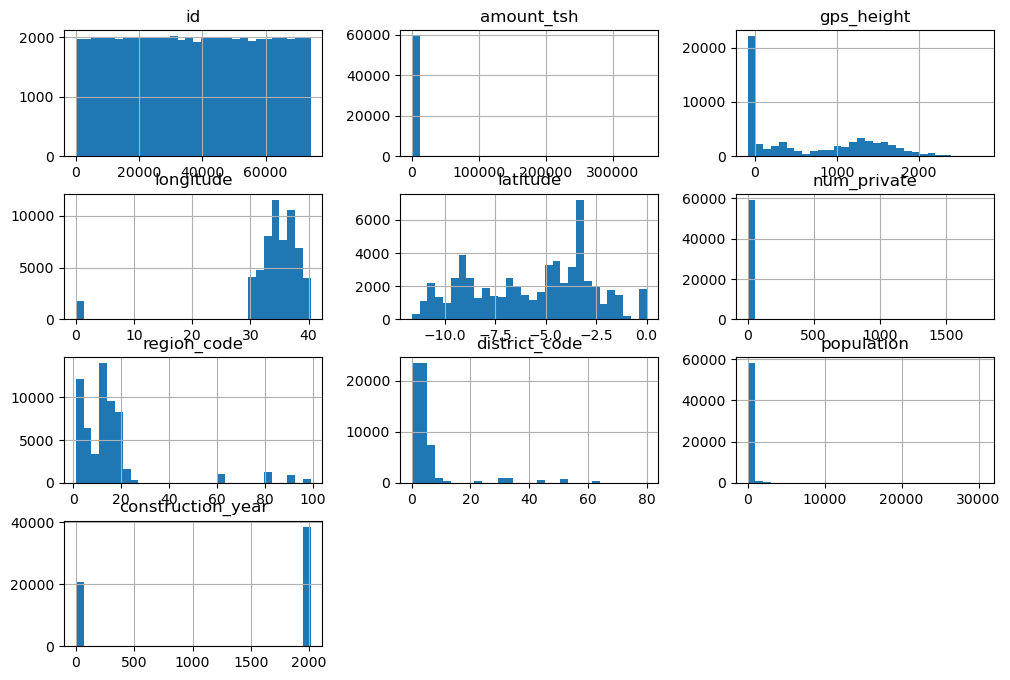

In [297]:
#histogram for numerical features
train.hist(figsize=(12, 8), bins=30)
plt.show()

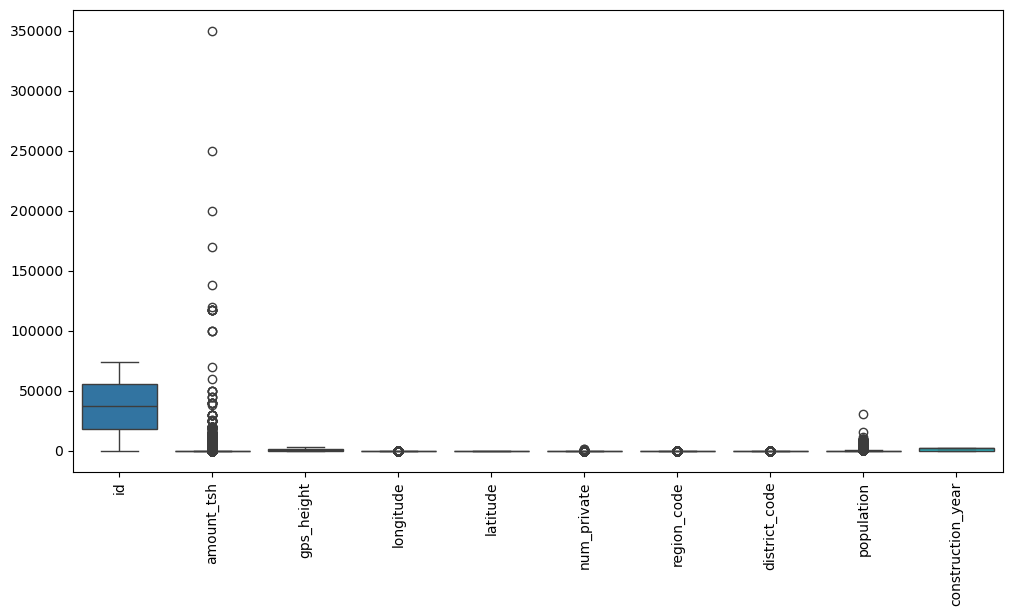

In [298]:
#boxplot to visualise skewness
plt.figure(figsize=(12, 6))
sns.boxplot(data=train.select_dtypes(include="number"))
plt.xticks(rotation=90)
plt.show()

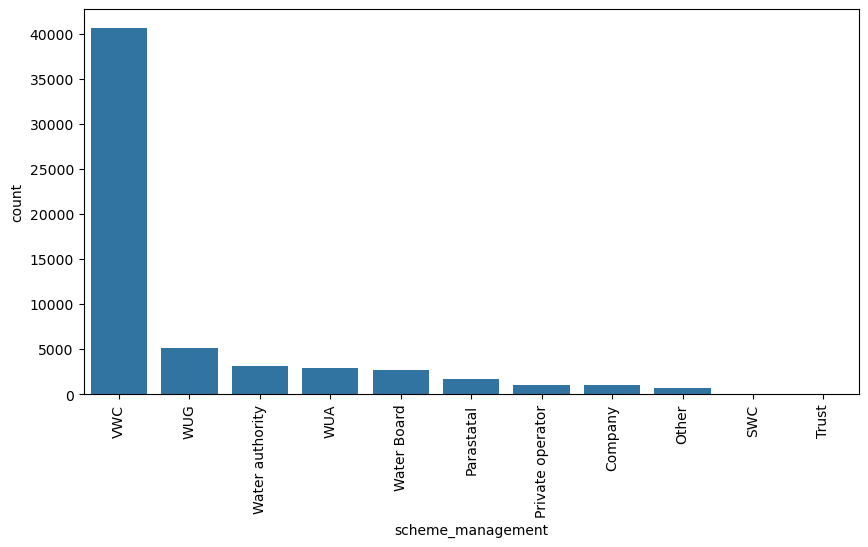

In [299]:
#to check the frequency of each category
plt.figure(figsize=(10,5))
sns.countplot(x=train["scheme_management"], order=train["scheme_management"].value_counts().index)
plt.xticks(rotation=90)
plt.show()

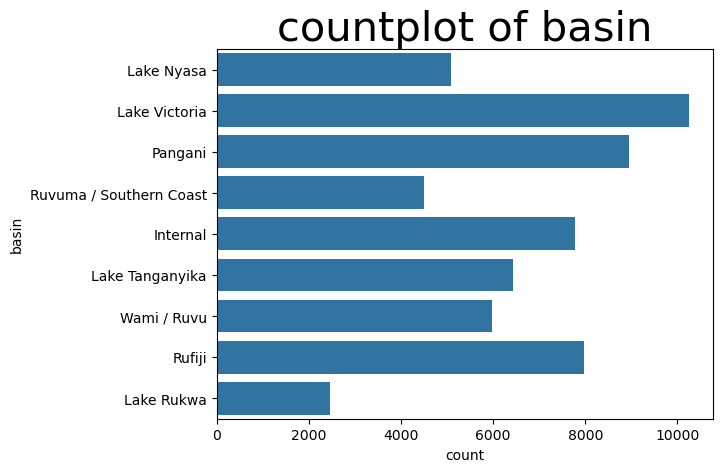

<Figure size 400x400 with 0 Axes>

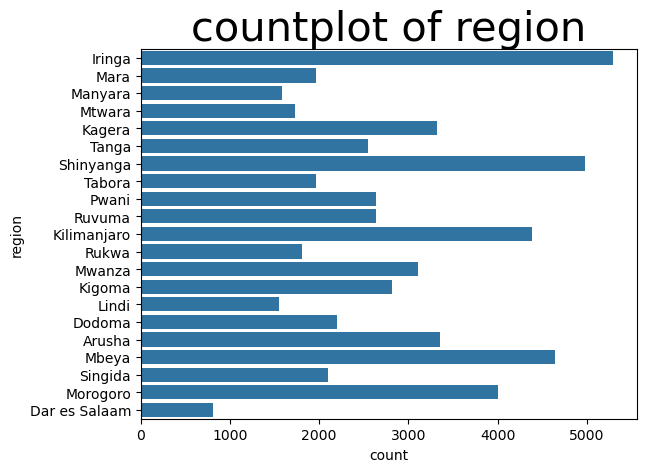

<Figure size 400x400 with 0 Axes>

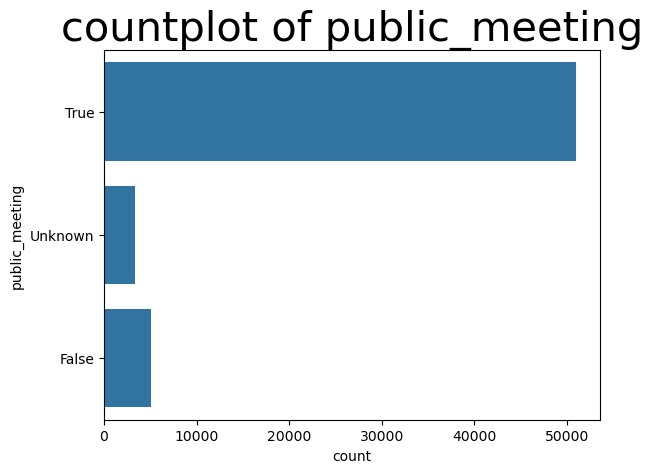

<Figure size 400x400 with 0 Axes>

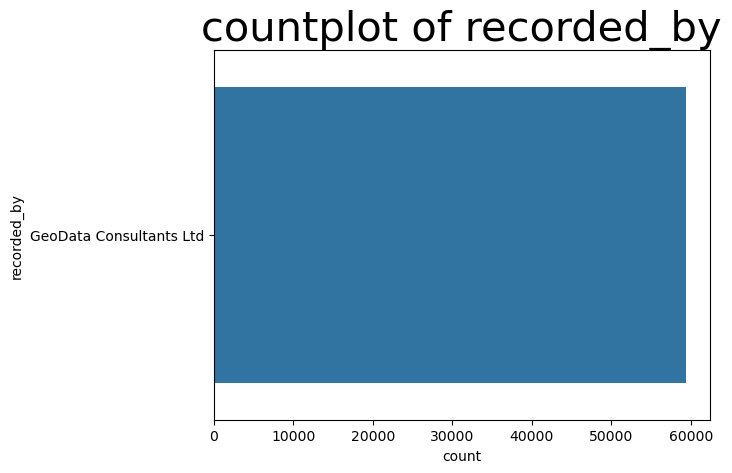

<Figure size 400x400 with 0 Axes>

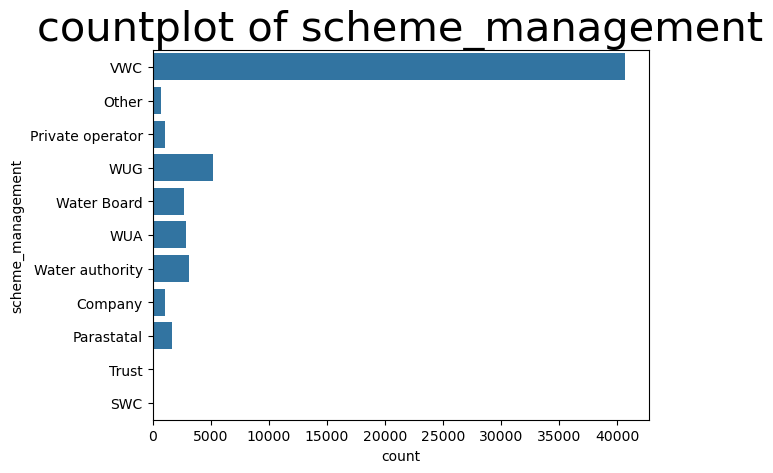

<Figure size 400x400 with 0 Axes>

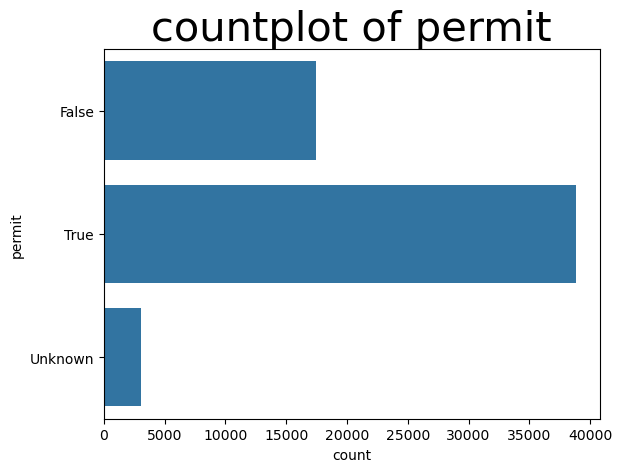

<Figure size 400x400 with 0 Axes>

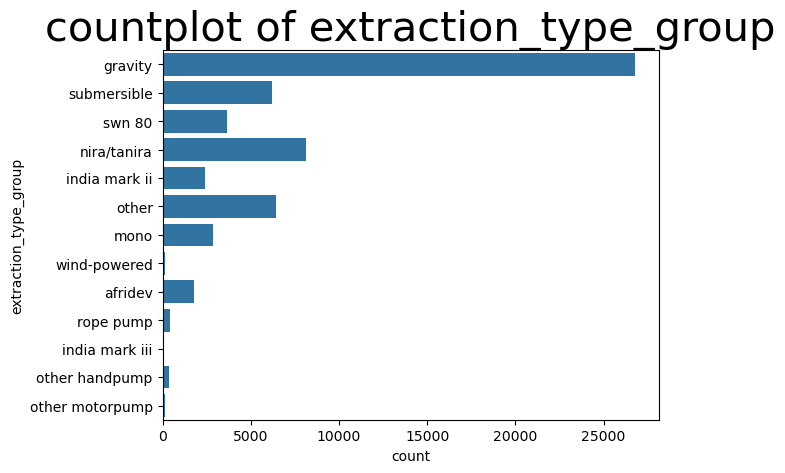

<Figure size 400x400 with 0 Axes>

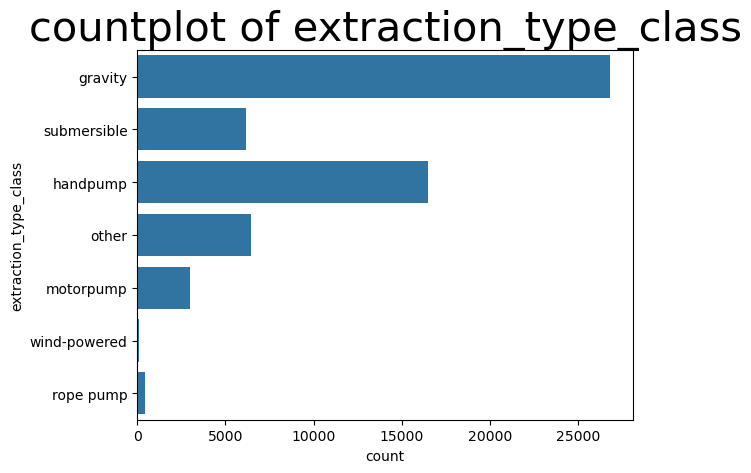

<Figure size 400x400 with 0 Axes>

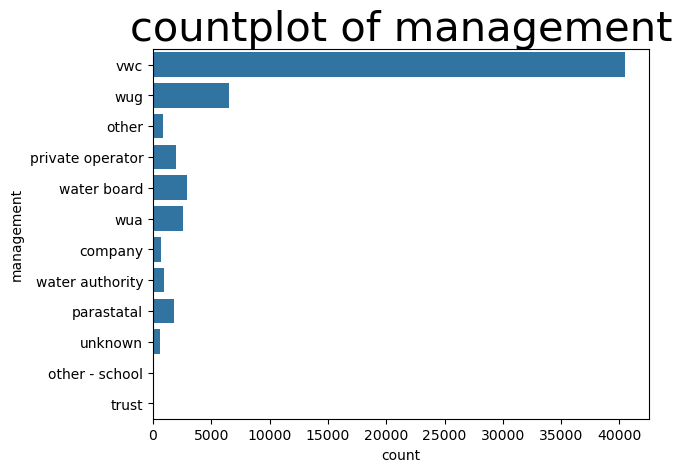

<Figure size 400x400 with 0 Axes>

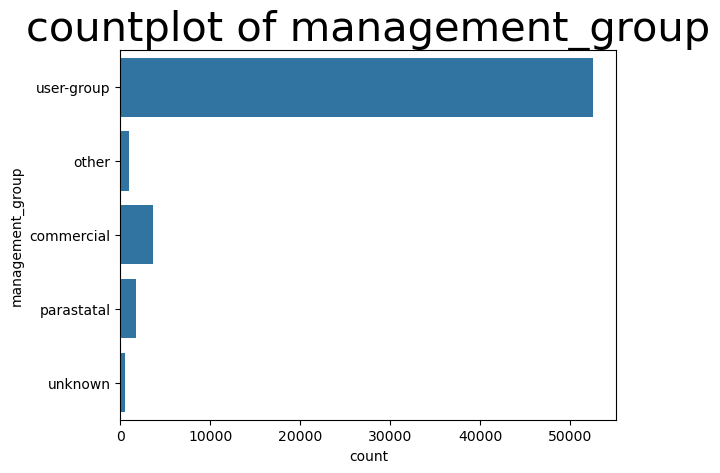

<Figure size 400x400 with 0 Axes>

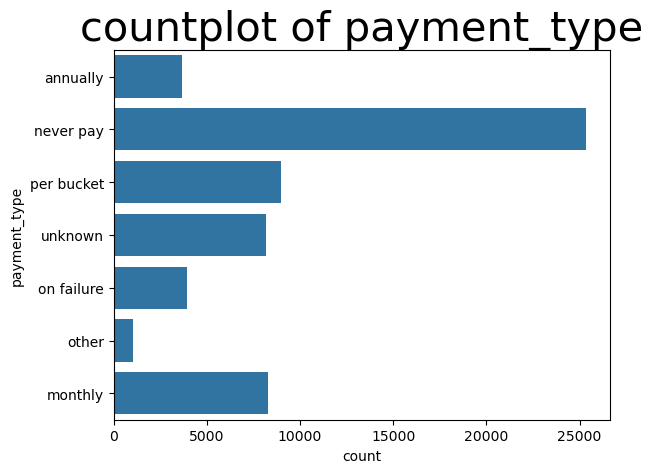

<Figure size 400x400 with 0 Axes>

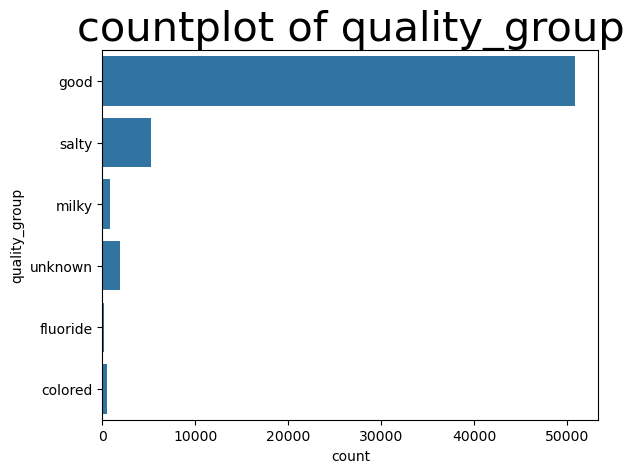

<Figure size 400x400 with 0 Axes>

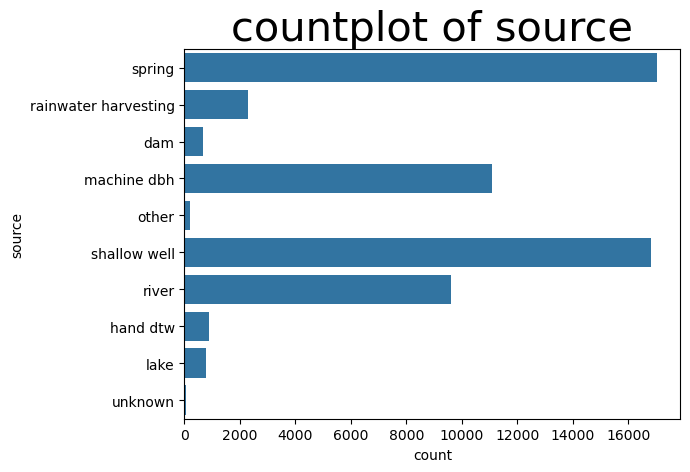

<Figure size 400x400 with 0 Axes>

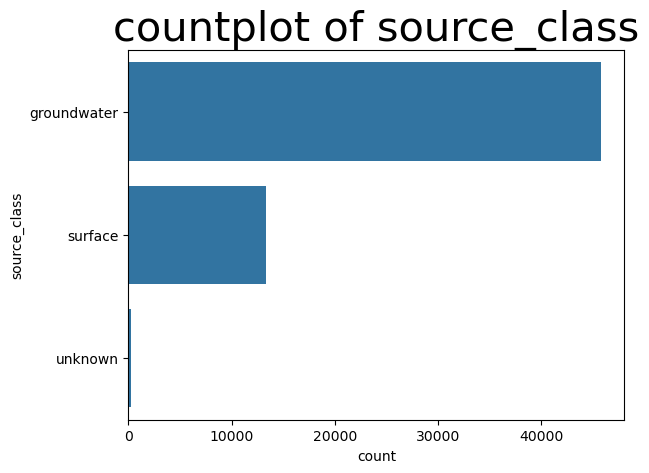

<Figure size 400x400 with 0 Axes>

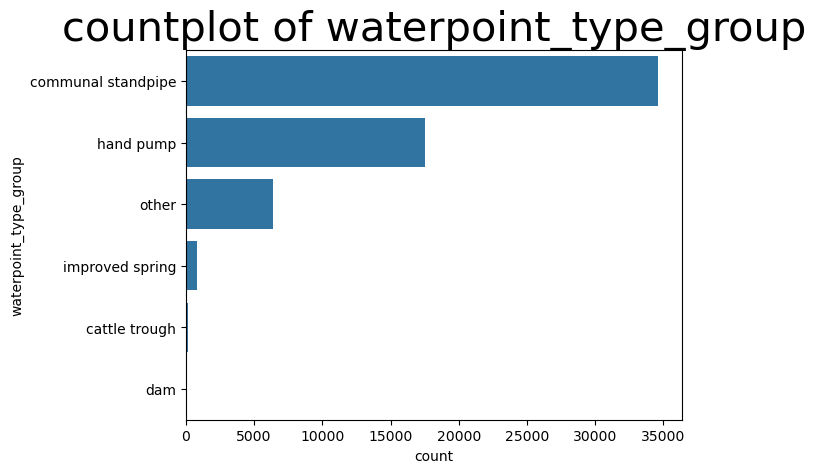

<Figure size 400x400 with 0 Axes>

In [300]:
# selecting object datatypes columns

categorical = ['basin', 'region',
         'public_meeting', 'recorded_by',
       'scheme_management', 'permit',
       'extraction_type_group', 'extraction_type_class',
       'management', 'management_group',  'payment_type',
        'quality_group',
       'source', 'source_class',
       'waterpoint_type_group']
categorical

# lets make a for loop to make countplots for our categorical variables.
for col in categorical:
  ax=sns.countplot(y=col,data=train)
  plt.title(f"countplot of {col}", fontsize = 30)
  plt.show(plt.figure(figsize=(4, 4)))

In [301]:
# let's get maximum and minimum values for latitude and longitude
BBox = ((
    train_new[train_new['longitude']!=0].longitude.min(),
    train_new.longitude.max(),
    train_new.latitude.min(),
    train_new.latitude.max()
))
BBox

(29.6071219, 40.34519307, -11.64944018, -2e-08)

<Figure size 3000x2500 with 0 Axes>

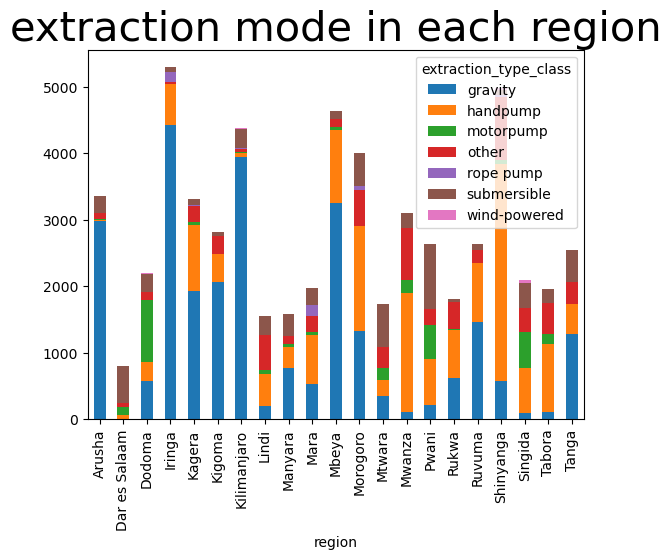

<Figure size 200x200 with 0 Axes>

In [302]:
#creating a crosstab to check on the extraction model
crosstb=pd.crosstab(train_new.region,train_new.extraction_type_class)

#creating a bar plot
plt.figure(figsize=(30,25))
pl=crosstb.plot(kind="bar",stacked=True,rot=90)
plt.title("extraction mode in each region", fontsize=30)
plt.show(plt.figure(figsize=(2, 2)))

<Figure size 3400x3000 with 0 Axes>

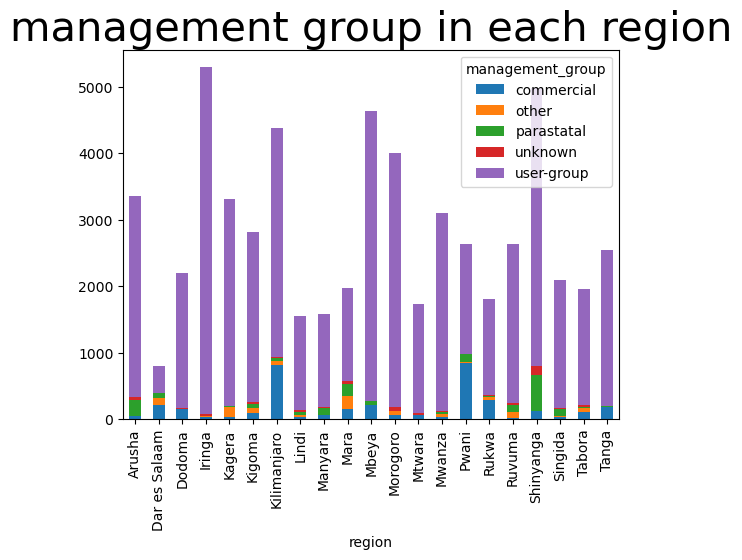

<Figure size 400x400 with 0 Axes>

In [303]:
#df.sort_values('arrival_date_month',ascending=False)
#creating a crosstab
crosstb=pd.crosstab(train.region,train.management_group)
#creating a bar plot
plt.figure(figsize=(34,30))
pl=crosstb.plot(kind="bar",stacked=True,rot=90)
plt.title("management group in each region", fontsize=30)
plt.show(plt.figure(figsize=(4, 4)))

# Multivariate Analysis

## Preprocessing

In [306]:
# check data info to check on its characteristic
train_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 59400 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              59400 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59400 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [307]:
# get the numeric cols and the cat cols
num_original_columns = train_new.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_new.select_dtypes(exclude=np.number).columns.tolist()

print("Categorical columns:", categorical_cols)
num_original_columns

Categorical columns: ['date_recorded', 'funder', 'installer', 'wpt_name', 'basin', 'subvillage', 'region', 'lga', 'ward', 'public_meeting', 'recorded_by', 'scheme_management', 'scheme_name', 'permit', 'extraction_type', 'extraction_type_group', 'extraction_type_class', 'management', 'management_group', 'payment', 'payment_type', 'water_quality', 'quality_group', 'quantity', 'quantity_group', 'source', 'source_type', 'source_class', 'waterpoint_type', 'waterpoint_type_group']


['id',
 'amount_tsh',
 'gps_height',
 'longitude',
 'latitude',
 'num_private',
 'region_code',
 'district_code',
 'population',
 'construction_year']

In [308]:
train_new[categorical_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   date_recorded          59400 non-null  object
 1   funder                 59400 non-null  object
 2   installer              59400 non-null  object
 3   wpt_name               59400 non-null  object
 4   basin                  59400 non-null  object
 5   subvillage             59400 non-null  object
 6   region                 59400 non-null  object
 7   lga                    59400 non-null  object
 8   ward                   59400 non-null  object
 9   public_meeting         59400 non-null  object
 10  recorded_by            59400 non-null  object
 11  scheme_management      59400 non-null  object
 12  scheme_name            59400 non-null  object
 13  permit                 59400 non-null  object
 14  extraction_type        59400 non-null  object
 15  extraction_type_gro

In [309]:
for i in categorical_cols:
    unique_values = train_new[i].unique()[:5]  # Get the first 5 unique values
    print(f'The variable "{i}" has {train_new[i].nunique()} unique values. First 5: {unique_values}')

The variable "date_recorded" has 356 unique values. First 5: ['2011-03-14' '2013-03-06' '2013-02-25' '2013-01-28' '2011-07-13']
The variable "funder" has 1896 unique values. First 5: ['Roman' 'Grumeti' 'Lottery Club' 'Unicef' 'Action In A']
The variable "installer" has 2145 unique values. First 5: ['Roman' 'GRUMETI' 'World vision' 'UNICEF' 'Artisan']
The variable "wpt_name" has 37399 unique values. First 5: ['none' 'Zahanati' 'Kwa Mahundi' 'Zahanati Ya Nanyumbu' 'Shuleni']
The variable "basin" has 9 unique values. First 5: ['Lake Nyasa' 'Lake Victoria' 'Pangani' 'Ruvuma / Southern Coast'
 'Internal']
The variable "subvillage" has 19288 unique values. First 5: ['Mnyusi B' 'Nyamara' 'Majengo' 'Mahakamani' 'Kyanyamisa']
The variable "region" has 21 unique values. First 5: ['Iringa' 'Mara' 'Manyara' 'Mtwara' 'Kagera']
The variable "lga" has 125 unique values. First 5: ['Ludewa' 'Serengeti' 'Simanjiro' 'Nanyumbu' 'Karagwe']
The variable "ward" has 2092 unique values. First 5: ['Mundindi' 'N

In [310]:
df_encoded = train_new

# Convert 'date_recorded' column to datetime
df_encoded['date_recorded'] = pd.to_datetime(df_encoded['date_recorded'], errors='coerce')

# Extract the year
df_encoded['year'] = df_encoded['date_recorded'].dt.year

# Display the first few rows
df_encoded.head()


,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,year
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,2011
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,Unknown,GeoData Consultants Ltd,Other,Unknown,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,2013
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,2013
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,Unknown,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,2013
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,VWC,Unknown,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,2011


In [311]:
# Encode 'Permit' (Ordinal Encoding)
df_encoded['Permit'] = df_encoded['permit'].map({'True': 0, 'False': 1})
df_encoded.tail()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,year,Permit
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,Pangani,Kiduruni,Kilimanjaro,3,5,Hai,Masama Magharibi,125,True,GeoData Consultants Ltd,Water Board,Losaa Kia water supply,True,1999,gravity,gravity,gravity,water board,user-group,pay per bucket,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,2013,NaN
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,Rufiji,Igumbilo,Iringa,11,4,Njombe,Ikondo,56,True,GeoData Consultants Ltd,VWC,Ikondo electrical water sch,True,1996,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,2011,NaN
59397,37057,0.0,2011-04-11,Unknown,0,Unknown,34.017087,-8.750434,Mashine,0,Rufiji,Madungulu,Mbeya,12,7,Mbarali,Chimala,0,True,GeoData Consultants Ltd,VWC,Unknown,False,0,swn 80,swn 80,handpump,vwc,user-group,pay monthly,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,2011,NaN
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,Rufiji,Mwinyi,Dodoma,1,4,Chamwino,Mvumi Makulu,0,True,GeoData Consultants Ltd,VWC,Unknown,True,0,nira/tanira,nira/tanira,handpump,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,2011,NaN
59399,26348,0.0,2011-03-23,World Bank,191,World,38.104048,-6.747464,Kwa Mzee Lugawa,0,Wami / Ruvu,Kikatanyemba,Morogoro,5,2,Morogoro Rural,Ngerengere,150,True,GeoData Consultants Ltd,VWC,Unknown,True,2002,nira/tanira,nira/tanira,handpump,vwc,user-group,pay when scheme fails,on failure,salty,salty,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,2011,NaN


In [312]:
#checking the display settings
import pandas as pd
pd.set_option('display.width', 200)
pd.set_option('display.max_columns', None)
print(df_encoded.head())

      id  amount_tsh date_recorded        funder  gps_height     installer  longitude   latitude              wpt_name  num_private                    basin  subvillage   region  region_code  \
0  69572      6000.0    2011-03-14         Roman        1390         Roman  34.938093  -9.856322                  none            0               Lake Nyasa    Mnyusi B   Iringa           11   
1   8776         0.0    2013-03-06       Grumeti        1399       GRUMETI  34.698766  -2.147466              Zahanati            0            Lake Victoria     Nyamara     Mara           20   
2  34310        25.0    2013-02-25  Lottery Club         686  World vision  37.460664  -3.821329           Kwa Mahundi            0                  Pangani     Majengo  Manyara           21   
3  67743         0.0    2013-01-28        Unicef         263        UNICEF  38.486161 -11.155298  Zahanati Ya Nanyumbu            0  Ruvuma / Southern Coast  Mahakamani   Mtwara           90   
4  19728         0.0    2011-0

In [313]:
#importing models
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

In [314]:
label_encoders = {}  # Store encoders for inverse transformation

# Encode categorical features using Label Encoding
for column in categorical_cols:
    if column not in ['permit', 'date_recorded', 'status_group', 'id'] and column in df_encoded.columns:
        le = LabelEncoder()
        df_encoded[column] = le.fit_transform(df_encoded[column].astype(str).fillna("Unknown"))  # Handle NaNs
        label_encoders[column] = le  # Store encoder

# Display first few rows
pd.set_option('display.max_columns', None)
df_encoded.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,year,Permit
0,69572,6000.0,2011-03-14,1368,1390,1518,34.938093,-9.856322,37398,0,1,11807,3,11,5,51,1426,109,1,0,6,2244,False,1999,3,1,0,7,4,2,0,6,2,1,1,8,6,0,1,1,2011,NaN
1,8776,0.0,2013-03-06,469,1399,545,34.698766,-2.147466,37194,0,4,15838,9,20,2,103,1576,280,2,0,1,2513,True,2010,3,1,0,11,4,0,2,6,2,2,2,5,3,1,1,1,2013,NaN
2,34310,25.0,2013-02-25,825,686,2048,37.460664,-3.821329,14572,0,5,9074,8,21,4,108,1624,250,1,0,6,2120,True,2009,3,1,0,7,4,4,5,6,2,1,1,0,1,1,2,1,2013,NaN
3,67743,0.0,2013-01-28,1740,263,1852,38.486161,-11.155298,37284,0,7,8982,12,90,63,87,1571,58,1,0,6,2513,True,1986,14,10,5,7,4,0,2,6,2,0,0,3,0,0,2,1,2013,NaN
4,19728,0.0,2011-07-13,20,0,119,31.130847,-1.825359,35528,0,4,7698,4,18,1,26,1687,0,1,0,6,2513,True,0,3,1,0,1,1,0,2,6,2,3,3,5,3,1,1,1,2011,NaN


In [315]:
# Convert boolean columns to numeric (0 and 1)
for col in df_encoded.select_dtypes(include='bool'):
    df_encoded[col] = df_encoded[col].astype(int)
df_encoded.tail()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,year,Permit
59395,60739,10.0,2013-05-03,436,1210,201,37.169807,-3.253847,513,0,5,5681,6,3,5,16,1090,125,1,0,9,1068,True,1999,3,1,0,9,4,4,5,6,2,1,1,8,6,0,1,1,2013,NaN
59396,27263,4700.0,2011-05-07,177,1212,265,35.249991,-9.070629,24074,0,6,2980,3,11,4,91,353,56,1,0,6,479,True,1996,3,1,0,7,4,2,0,6,2,1,1,6,4,1,1,1,2011,NaN
59397,37057,0.0,2011-04-11,1749,0,1869,34.017087,-8.750434,27926,0,6,8784,10,12,7,59,177,0,1,0,6,2513,False,0,15,11,1,7,4,3,1,1,1,1,1,3,0,0,4,3,2011,NaN
59398,31282,0.0,2011-03-08,884,0,1213,35.861315,-6.378573,29693,0,6,14012,2,1,4,11,1449,0,1,0,6,2513,True,0,8,5,1,7,4,0,2,6,2,2,2,7,5,0,4,3,2011,NaN
59399,26348,0.0,2011-03-23,1864,191,2040,38.104048,-6.747464,18700,0,8,5892,11,5,2,71,1610,150,1,0,6,2513,True,2002,8,5,1,7,4,5,3,4,4,1,1,7,5,0,4,3,2011,NaN


## Scaling

In [317]:
# Ensure df_scaler is a copy of df_encoded to avoid modifying the original DataFrame
df_scaler = df_encoded.copy()

In [318]:
numeric_cols = df_encoded.select_dtypes(include=np.number).columns.tolist()

for i, col in enumerate(num_original_columns):
    print(df_encoded[col].skew())

0.002622530349529895
57.8077999458852
0.4624020849809572
-4.191046454962571
-0.1520365708701084
91.93374999482286
3.1738181098177294
3.962045299260537
12.660713588843592
-0.6349277865999228


In [319]:
df_encoded[numeric_cols].describe()

,id,amount_tsh,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,year,Permit
count,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.0,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,0.0
mean,37115.131768,317.650385,890.451061,668.297239,812.249310,34.077427,-5.706033e+00,21102.321684,0.474141,4.077172,9703.474226,9.835606,15.297003,5.629747,60.039882,1056.830387,179.909983,0.971027,0.0,6.231987,1902.832710,1300.652475,6.331279,3.936549,1.264663,7.275741,3.638418,2.318013,2.842104,5.754293,2.263047,1.325758,1.325758,6.063199,3.970556,0.233737,2.574091,2.056212,2011.921667,NaN
std,21453.128371,2997.574558,598.022634,693.116350,613.478765,6.567432,2.946019e+00,12013.148195,12.236230,2.473082,5519.463090,5.936892,17.587406,9.633649,35.244499,595.251387,471.482176,0.374689,0.0,1.788226,820.818494,951.620547,4.213948,3.527073,1.626676,2.045373,1.058579,2.271259,1.836111,0.900820,0.784268,0.803750,0.803750,2.034190,2.191798,0.434129,1.781438,1.378937,0.958758,NaN
min,0.000000,0.000000,0.000000,-90.000000,0.000000,0.000000,-1.164944e+01,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2002.000000,NaN
25%,18519.750000,0.000000,446.000000,0.000000,390.000000,33.090347,-8.540621e+00,10124.750000,0.000000,2.000000,5156.750000,4.000000,5.000000,2.000000,30.000000,552.000000,0.000000,1.000000,0.0,6.000000,1225.000000,0.000000,3.000000,1.000000,0.000000,7.000000,4.000000,0.000000,2.000000,6.000000,2.000000,1.000000,1.000000,5.000000,3.000000,0.000000,1.000000,1.000000,2011.000000,NaN
50%,37061.500000,0.000000,657.500000,369.000000,480.500000,34.908743,-5.021597e+00,22249.500000,0.000000,4.000000,9661.000000,10.000000,12.000000,3.000000,60.000000,1042.000000,25.000000,1.000000,0.0,6.000000,2513.000000,1986.000000,4.000000,2.000000,1.000000,7.000000,4.000000,2.000000,2.000000,6.000000,2.000000,1.000000,1.000000,7.000000,5.000000,0.000000,2.000000,1.000000,2012.000000,NaN
75%,55656.500000,20.000000,1427.000000,1319.250000,1398.000000,37.178387,-3.326156e+00,32534.250000,0.000000,6.000000,14283.000000,15.000000,17.000000,5.000000,91.000000,1576.000000,215.000000,1.000000,0.0,6.000000,2513.000000,2004.000000,9.000000,6.000000,2.000000,7.000000,4.000000,4.000000,5.000000,6.000000,2.000000,2.000000,2.000000,8.000000,6.000000,0.000000,4.000000,3.000000,2013.000000,NaN
max,74247.000000,350000.000000,1895.000000,2770.000000,2144.000000,40.345193,-2.000000e-08,37398.000000,1776.000000,8.000000,19287.000000,20.000000,99.000000,80.000000,124.000000,2091.000000,30500.000000,2.000000,0.0,10.000000,2695.000000,2013.000000,17.000000,12.000000,6.000000,11.000000,4.000000,6.000000,6.000000,7.000000,5.000000,4.000000,4.000000,9.000000,6.000000,2.000000,6.000000,5.000000,2013.000000,NaN


In [320]:
#Remove 'permit' from the list of columns to be scaled
numeric_cols = [col for col in numeric_cols if col != 'permit']
print("Numeric columns:", numeric_cols)

Numeric columns: ['id', 'amount_tsh', 'funder', 'gps_height', 'installer', 'longitude', 'latitude', 'wpt_name', 'num_private', 'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga', 'ward', 'population', 'public_meeting', 'recorded_by', 'scheme_management', 'scheme_name', 'construction_year', 'extraction_type', 'extraction_type_group', 'extraction_type_class', 'management', 'management_group', 'payment', 'payment_type', 'water_quality', 'quality_group', 'quantity', 'quantity_group', 'source', 'source_type', 'source_class', 'waterpoint_type', 'waterpoint_type_group', 'year', 'Permit']


In [321]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the numerical columns
df_scaler[numeric_cols] = scaler.fit_transform(df_scaler[numeric_cols])
df_scaler.head()

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/_array_api.py:701: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmin(X, axis=axis))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/_array_api.py:718: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmax(X, axis=axis))


,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,year,Permit
0,0.937034,0.017143,2011-03-14,0.721900,0.517483,0.708022,0.865979,0.153923,1.000000,0.0,0.125,0.612174,0.15,0.102041,0.0625,0.411290,0.681970,0.003574,0.5,0.0,0.6,0.832653,False,0.993045,0.176471,0.083333,0.000000,0.636364,1.00,0.333333,0.000000,0.857143,0.4,0.25,0.25,0.888889,1.000000,0.0,0.166667,0.2,0.818182,NaN
1,0.118200,0.000000,2013-03-06,0.247493,0.520629,0.254198,0.860047,0.815659,0.994545,0.0,0.500,0.821175,0.45,0.193878,0.0250,0.830645,0.753706,0.009180,1.0,0.0,0.1,0.932468,True,0.998510,0.176471,0.083333,0.000000,1.000000,1.00,0.000000,0.333333,0.857143,0.4,0.50,0.50,0.555556,0.500000,0.5,0.166667,0.2,1.000000,NaN
2,0.462106,0.000071,2013-02-25,0.435356,0.271329,0.955224,0.928504,0.671973,0.389647,0.0,0.625,0.470472,0.40,0.204082,0.0500,0.870968,0.776662,0.008197,0.5,0.0,0.6,0.786642,True,0.998013,0.176471,0.083333,0.000000,0.636364,1.00,0.666667,0.833333,0.857143,0.4,0.25,0.25,0.000000,0.166667,0.5,0.333333,0.2,1.000000,NaN
3,0.912401,0.000000,2013-01-28,0.918206,0.123427,0.863806,0.953922,0.042418,0.996952,0.0,0.875,0.465702,0.60,0.908163,0.7875,0.701613,0.751315,0.001902,0.5,0.0,0.6,0.932468,True,0.986587,0.823529,0.833333,0.833333,0.636364,1.00,0.000000,0.333333,0.857143,0.4,0.00,0.00,0.333333,0.000000,0.0,0.333333,0.2,1.000000,NaN
4,0.265708,0.000000,2011-07-13,0.010554,0.031469,0.055504,0.771612,0.843309,0.949997,0.0,0.500,0.399129,0.20,0.173469,0.0125,0.209677,0.806791,0.000000,0.5,0.0,0.6,0.932468,True,0.000000,0.176471,0.083333,0.000000,0.090909,0.25,0.000000,0.333333,0.857143,0.4,0.75,0.75,0.555556,0.500000,0.5,0.166667,0.2,0.818182,NaN


In [322]:
df_scaler.construction_year.unique()

array([0.99304521, 0.99850969, 0.99801292, 0.98658718, 0.        ,
       0.99900646, 0.98708395, 0.98907104, 0.98261302, 0.98956781,
       0.99751615, 0.98062593, 0.99354198, 0.99453552, 0.99552906,
       0.97963239, 0.99503229, 0.98360656, 0.99701937, 0.98012916,
       0.98609041, 0.97863885, 0.99105812, 0.9965226 , 0.97466468,
       0.99602583, 0.99205166, 0.99950323, 0.99155489, 0.98211624,
       0.98509687, 0.98559364, 0.98857427, 0.9846001 , 0.98161947,
       0.98758073, 0.9880775 , 0.9811227 , 0.97367114, 0.97416791,
       0.99254844, 0.97516145, 0.97913562, 0.99056135, 0.97764531,
       0.99006458, 0.99403875, 0.98310979, 0.97714853, 1.        ,
       0.97814208, 0.98410333, 0.97565822, 0.97665176, 0.97615499])

In [323]:
# Merge cleaned training data with labels
train_merged = train_new.merge(labels, on="id")

# Define features (X) and target (y)
X_train = train_merged.drop(columns=["id", "status_group"])  # Features
y_train = train_merged["status_group"]  # Target

# Prepare test data (apply same cleaning as train)
test_cleaned = test.fillna("Unknown")  # Ensure no missing values
X_test = test_cleaned.drop(columns=["id"])  # Features for prediction

In [324]:
X = train_merged.drop(columns=["id", "status_group"])  # Define X (features)
y = train_merged["status_group"]  # Define y (target)

In [325]:
# Train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [326]:
train["permit"] = train["permit"].astype(str)  # Convert all values to string
train["permit"] = train["permit"].replace({"False": "No", "True": "Yes"})  # Standardize labels

# Verify the column data type
print(train["permit"].dtype)  # Should print 'object' (string type)

# Print unique values again
for col in categorical_columns:
    print(f"Column: {col}")
    print(train[col].unique())
    print()


object
Column: permit
['No' 'Yes' 'Unknown']



## Scaling Cont'd

In [328]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Ensure X_train and X_test are Pandas DataFrames
if isinstance(X_train, np.ndarray):
    X_train = pd.DataFrame(X_train)
if isinstance(X_test, np.ndarray):
    X_test = pd.DataFrame(X_test)

# Identify non-numeric columns
non_numeric_cols = X_train.select_dtypes(include=['object']).columns

# Convert date columns to numerical format
for col in non_numeric_cols:
    X_train[col] = pd.to_datetime(X_train[col], errors='coerce')
    X_test[col] = pd.to_datetime(X_test[col], errors='coerce')

    # Convert dates to days since a reference date
    ref_date = pd.Timestamp("2000-01-01")
    X_train[col] = (X_train[col] - ref_date).dt.days
    X_test[col] = (X_test[col] - ref_date).dt.days

# Handle NaN values (fill with median)
X_train.fillna(X_train.median(), inplace=True)
X_test.fillna(X_test.median(), inplace=True)

# Ensure only numerical data remains
X_train = X_train.select_dtypes(include=[np.number])
X_test = X_test.select_dtypes(include=[np.number])

# Ensure columns match between train and test
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# Replace infinite values
X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
X_test.replace([np.inf, -np.inf], np.nan, inplace=True)
X_train.fillna(X_train.median(), inplace=True)
X_test.fillna(X_test.median(), inplace=True)

# Drop constant columns (zero variance)
constant_cols = X_train.columns[X_train.nunique() <= 1]
X_train.drop(columns=constant_cols, inplace=True)
X_test.drop(columns=constant_cols, inplace=True)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [329]:
train.construction_year.unique()

array([1999, 2010, 2009, 1986,    0, 2011, 1987, 1991, 1978, 1992, 2008,
       1974, 2000, 2002, 2004, 1972, 2003, 1980, 2007, 1973, 1985, 1970,
       1995, 2006, 1962, 2005, 1997, 2012, 1996, 1977, 1983, 1984, 1990,
       1982, 1976, 1988, 1989, 1975, 1960, 1961, 1998, 1963, 1971, 1994,
       1968, 1993, 2001, 1979, 1967, 2013, 1969, 1981, 1964, 1966, 1965])

In [330]:
from sklearn.preprocessing import LabelEncoder

# Ensure y_train and y_test are properly defined
if isinstance(y_train, pd.DataFrame):
    y_train = y_train.values.ravel()  # Convert DataFrame column to 1D array

if isinstance(y_test, pd.DataFrame):
    y_test = y_test.values.ravel()

# Convert target variable (y_train, y_test) into categorical labels
le = LabelEncoder()
y_train = le.fit_transform(y_train)  # Encode training labels
y_test = le.transform(y_test)        # Encode test labels

# Print unique classes to verify encoding
print("Encoded Classes:", le.classes_)


Encoded Classes: ['functional' 'functional needs repair' 'non functional']


In [331]:
#checking the balance
import numpy as np
unique, counts = np.unique(y_train, return_counts=True)
print(dict(zip(unique, counts)))

{0: 25802, 1: 3466, 2: 18252}


## Modelling

In [333]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB


In [334]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "K-NN": KNeighborsClassifier(),
    "SVM": SVC(),
    "Naïve Bayes": GaussianNB()
}

In [335]:
# Training and Evaluating Models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))


Logistic Regression Accuracy: 0.6433
              precision    recall  f1-score   support

           0       0.64      0.83      0.72      6457
           1       0.44      0.01      0.03       851
           2       0.65      0.50      0.56      4572

    accuracy                           0.64     11880
   macro avg       0.58      0.45      0.44     11880
weighted avg       0.63      0.64      0.61     11880

Decision Tree Accuracy: 0.7531
              precision    recall  f1-score   support

           0       0.80      0.80      0.80      6457
           1       0.36      0.39      0.37       851
           2       0.77      0.76      0.76      4572

    accuracy                           0.75     11880
   macro avg       0.64      0.65      0.64     11880
weighted avg       0.76      0.75      0.75     11880

Random Forest Accuracy: 0.8137
              precision    recall  f1-score   support

           0       0.81      0.90      0.85      6457
           1       0.56      0

In [336]:
#handling imbalance
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(class_weight="balanced", random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

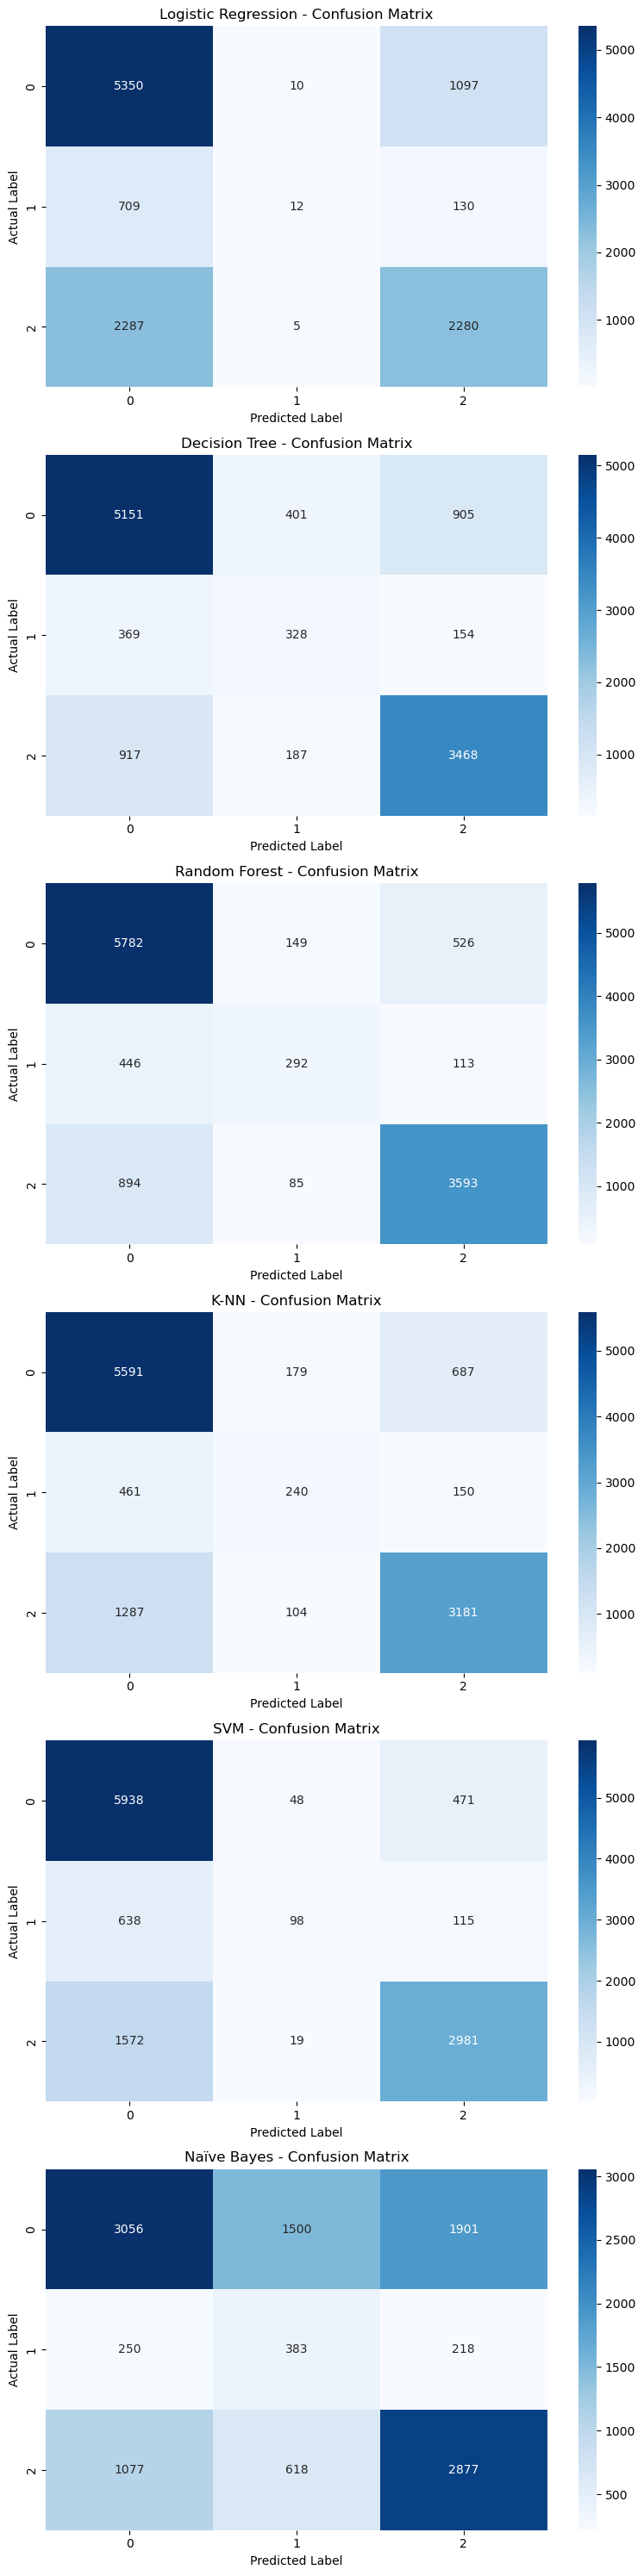

/var/folders/8t/04wltfc17zl85h0ngh6_64n80000gn/T/ipykernel_40830/4268724471.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(results.keys()), y=list(results.values()), palette="viridis")


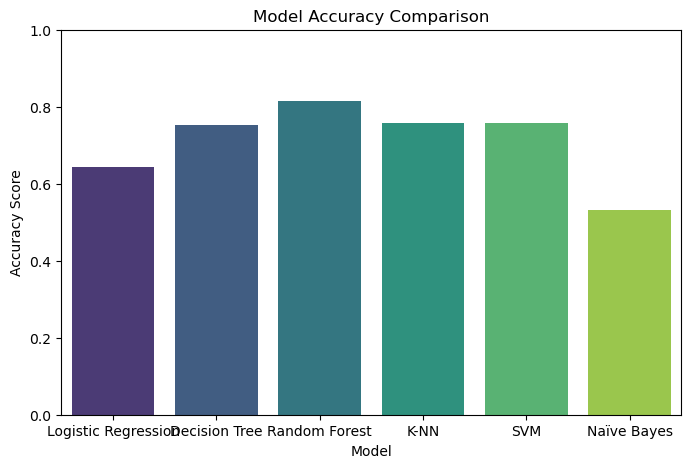

In [337]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Create subplots for confusion matrices
fig, axes = plt.subplots(len(models), 1, figsize=(8, len(models) * 5))

for i, (name, model) in enumerate(models.items()):
    # Predict
    y_pred = model.predict(X_test)

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=axes[i])
    axes[i].set_title(f"{name} - Confusion Matrix")
    axes[i].set_xlabel("Predicted Label")
    axes[i].set_ylabel("Actual Label")

plt.tight_layout()
plt.show()

# Accuracy Bar Chart
plt.figure(figsize=(8, 5))
sns.barplot(x=list(results.keys()), y=list(results.values()), palette="viridis")
plt.xlabel("Model")
plt.ylabel("Accuracy Score")
plt.title("Model Accuracy Comparison")
plt.ylim(0, 1)  # Accuracy is between 0 and 1
plt.show()


From evaluation, Random Forest is the most accurate with over 80%, this model should be used to predict Functionality of the water wells

### Hyperparameter Testing - Decision Tree

In [340]:
# Hyperparameter Tuning for Decision Tree
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define hyperparameter grid
param_grid_dt = {
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 5, 10]
}

# Initialize GridSearchCV
gs_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_dt, cv=3, scoring='accuracy', n_jobs=-1)

# Fit the model on training data
gs_dt.fit(X_train, y_train)

# Print the best hyperparameters and score
print("Best Parameters for Decision Tree:", gs_dt.best_params_)
print("Best Score:", gs_dt.best_score_)


Best Parameters for Decision Tree: {'max_depth': 15, 'min_samples_split': 10}
Best Score: 0.7590698653198653


### Hyperparameter Testing - Random Forest

In [342]:
# Hyperparameter Tuning for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 100],
    'max_depth': [None, 10, 30]
}
gs_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=3, scoring='accuracy')
gs_rf.fit(X_train, y_train)
print("Best Parameters for Random Forest:", gs_rf.best_params_)
print("Best Score:", gs_rf.best_score_)

Best Parameters for Random Forest: {'max_depth': 30, 'n_estimators': 100}
Best Score: 0.8027988215488217


### Hyperparameter Tuning for Naïve Bayes (var_smoothing)

In [344]:
# Hyperparameter Tuning for Naïve Bayes (var_smoothing)
param_grid_nb = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_nb = GridSearchCV(GaussianNB(), param_grid_nb, cv=3, scoring='accuracy')
gs_nb.fit(X_train, y_train)
print("Best Parameters for Naïve Bayes:", gs_nb.best_params_)
print("Best Score:", gs_nb.best_score_)


Best Parameters for Naïve Bayes: {'var_smoothing': 1.0}
Best Score: 0.6136574074074074


### Conclusion

The analysis provides key insights into the factors affecting water pump functionality. The classification model, particularly Random Forest, demonstrates strong predictive performance, accurately distinguishing between functional and non-functional pumps. Key factors such as pump age, installer, and water source significantly influence failure rates. While the model helps optimize maintenance strategies and resource allocation, some misclassifications highlight the need for further model refinement and validation to enhance reliability.

### Recommendation

1. Leverage Predictions for Maintenance – Use model insights to prevent pump failures through timely interventions.
2. Efficient Resource Distribution – Focus funding and maintenance on high-risk pumps and regions.
3. Improve Data Quality – Regularly update and refine data to enhance model accuracy.
4. Blend AI with Expert Input – Combine model predictions with field expertise for better decision-making.
5. Track and Optimize Models – Continuously assess and refine models to adapt to changing data trends.